In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("avc0706/luna16")

print("Path to dataset files:", path)

Path to dataset files: /Volumes/HP_P900/Users/tungnguyen/.cache/kagglehub/datasets/avc0706/luna16/versions/1


In [22]:
import os

os.listdir(path)

['sampleSubmission.csv',
 'subset4',
 'subset3',
 'subset2',
 'candidates.csv',
 'evaluationScript',
 'annotations.csv',
 'subset0',
 'subset1',
 'seg-lungs-LUNA16',
 'candidates_V2']

In [23]:
list_dir_subset0 = os.listdir(os.path.join(path, "subset0", "subset0"))

print(list_dir_subset0[:2])

['1.3.6.1.4.1.14519.5.2.1.6279.6001.430109407146633213496148200410.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.raw']


In [24]:
ex_mhd = os.path.join(os.path.join(path, "subset0", "subset0"), list_dir_subset0[0])
print(ex_mhd)

/Volumes/HP_P900/Users/tungnguyen/.cache/kagglehub/datasets/avc0706/luna16/versions/1/subset0/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.430109407146633213496148200410.mhd


(733, 512, 512)


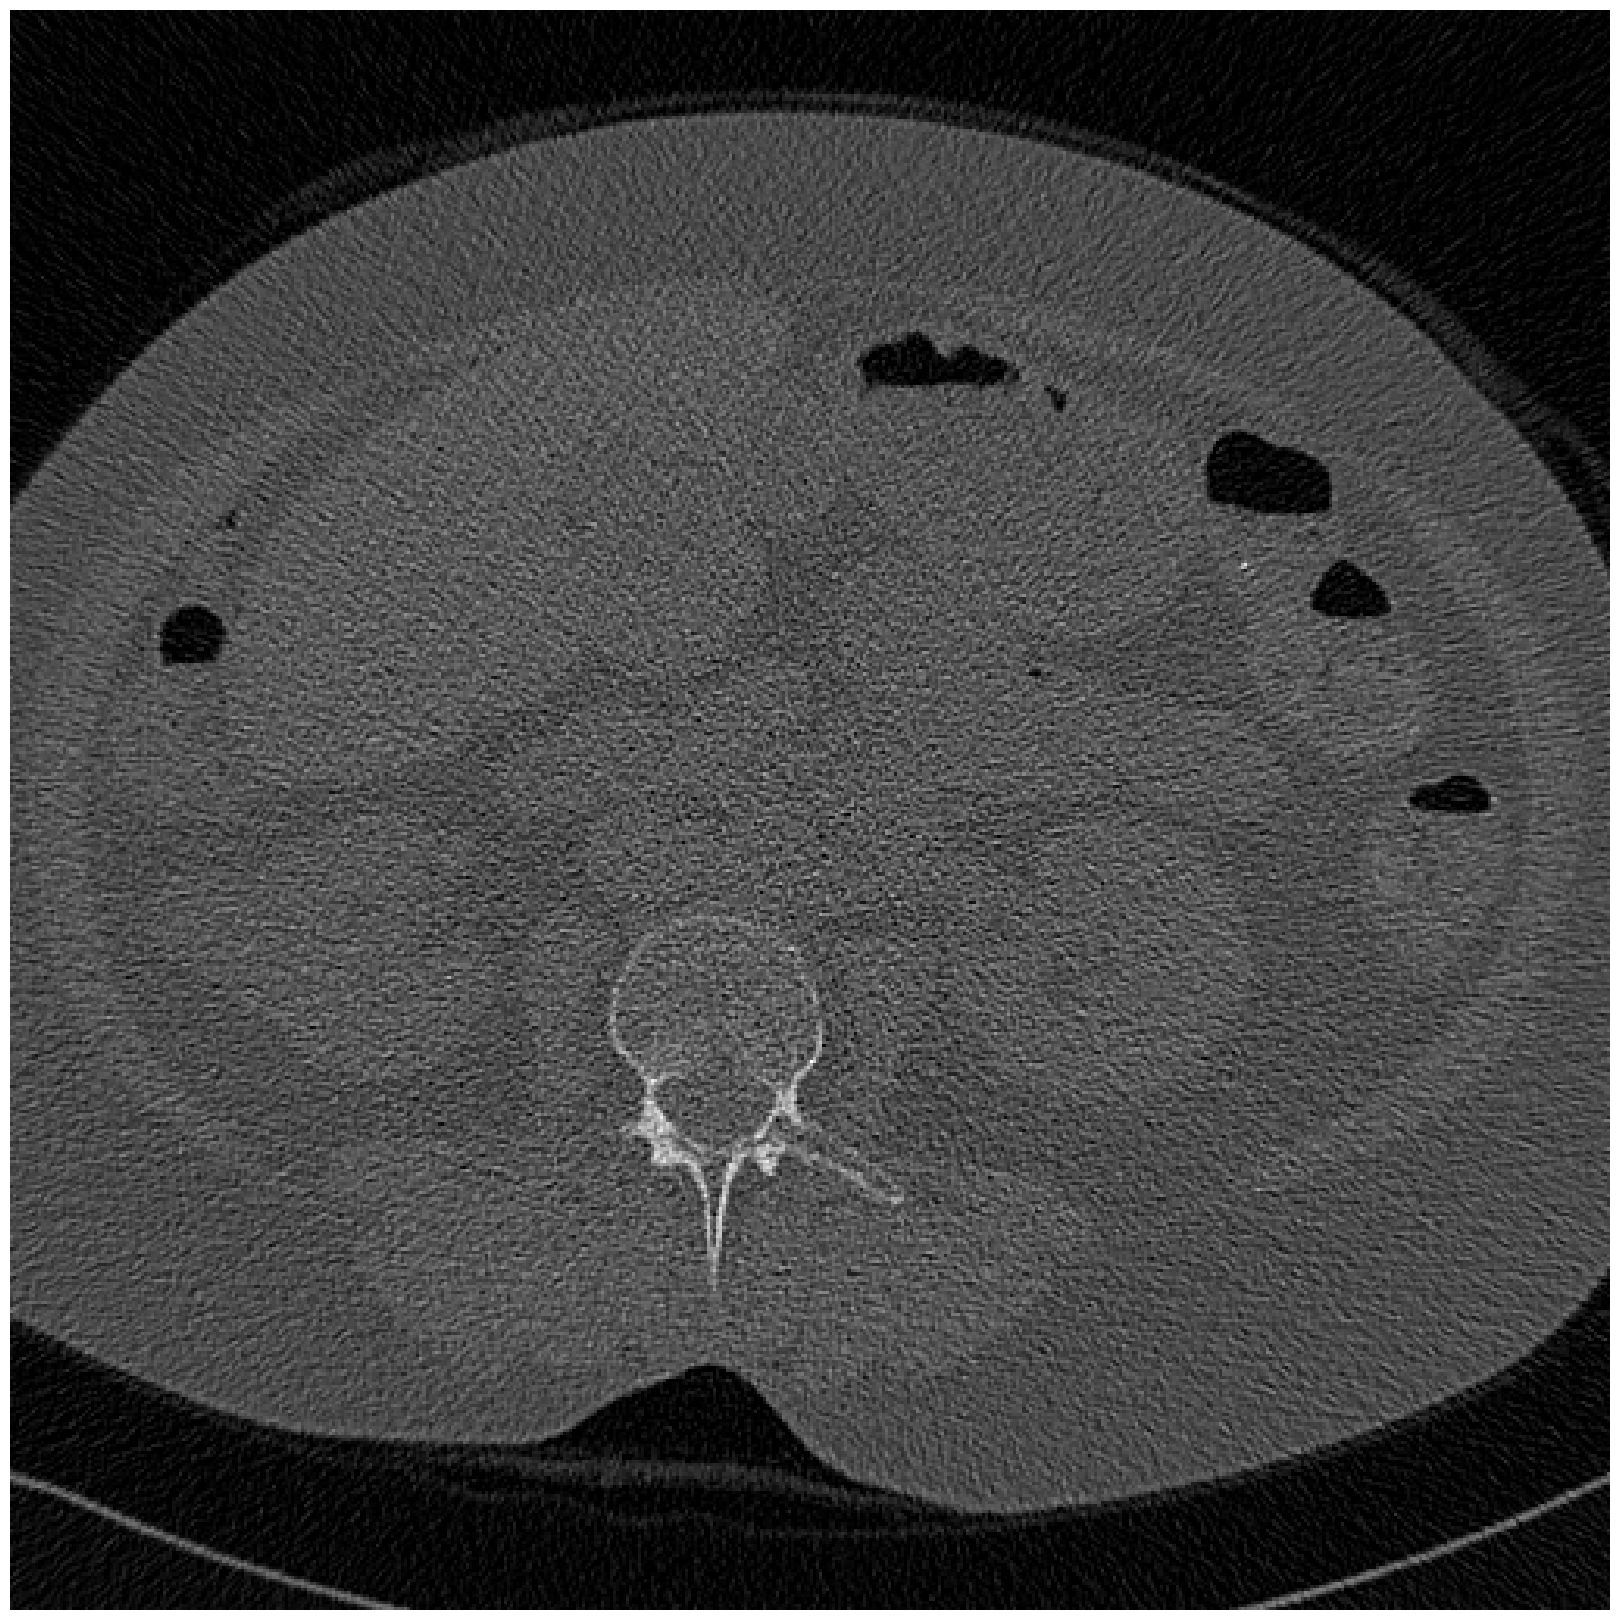

In [25]:
# Source - https://stackoverflow.com/a/57582860
# Posted by Sandipan Dey, modified by community. See post 'Timeline' for change history
# Retrieved 2026-02-05, License - CC BY-SA 4.0

import SimpleITK as sitk
import matplotlib.pylab as plt
import numpy as np

ct_scans = sitk.GetArrayFromImage(sitk.ReadImage(ex_mhd, sitk.sitkFloat32))

ct_scans = np.array(ct_scans)

print(ct_scans.shape)

plt.figure(figsize=(20,16))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)

plt.imshow(ct_scans[0]), plt.axis('off')
plt.show()


TypeError: Axes3D.scatter() missing 1 required positional argument: 'ys'

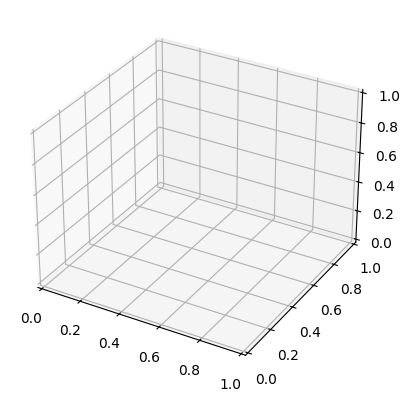

In [29]:
def array_to_point(ct_scans):
    shape = ct_scans.shape
    x, y, z, val = [], [], [], []
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                x.append(i)
                y.append(j)
                z.append(k)
                val.append(ct_scans[i][j][k])
    return x, y, z, val

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(array_to_point(ct_scans))
    